In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [4]:
%matplotlib inline

In [2]:
movies = pd.read_csv('fandango_score_comparison.csv')
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


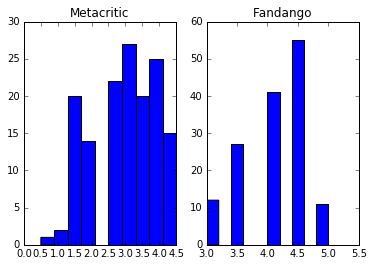

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(movies['Metacritic_norm_round'])
ax1.set_title('Metacritic')
ax2.hist(movies['Fandango_Stars'])
ax2.set_title('Fandango')
plt.show()

It appears the Fandango ratings are more negatively skewed, only starting from 3, whereas the Metacritic ratings start as low as 0.5.

In [12]:
mean_fandango = movies['Fandango_Stars'].mean()
mean_metacritic = movies['Metacritic_norm_round'].mean()

median_fandango = movies['Fandango_Stars'].median()
median_metacritic = movies['Metacritic_norm_round'].median()

std_fandango = np.std(movies['Fandango_Stars'])
std_metacritic = np.std(movies['Metacritic_norm_round'])

print('Means (F, M):')
print(mean_fandango)
print(mean_metacritic)

print('Medians (F, M):')
print(median_fandango)
print(median_metacritic)

print('Std Dev (F, M):')
print(std_fandango)
print(std_metacritic)

Means (F, M):
4.08904109589
2.97260273973
Medians (F, M):
4.0
3.0
Std Dev (F, M):
0.53853216127
0.987561029704


Here we see again that Fandango seems to give higher scores than Metacritic. This is indicated by the differences in the mean and median values between the two sites. 

The fact that the Fandango mean is higher than the median indicates that there are a few large values in the data. Meanwhile, Metacritic's mean is below its median, indicating that there are a few smaller values included in the data.

The standard deviation expectedly shows that Metacritic scores range considerably more than the Fandango scores.

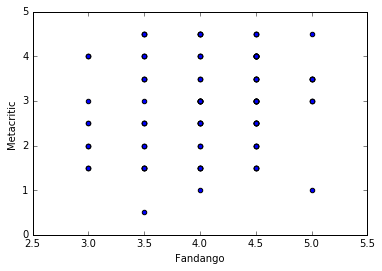

In [15]:
plt.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
plt.xlabel('Fandango')
plt.ylabel('Metacritic')

In [18]:
movies['fm_diff'] = np.absolute(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])


In [25]:
sorted_movies = movies.sort_values('fm_diff', ascending=False)
sorted_movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [29]:
r_val, p_val = stats.pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
r_val

0.17844919073895918

This shows that there is little correlation between Fandango and Metacritic scores. This is interesting because you would expect the same movie to receive a similar score.

In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
pred_3 = 3 * slope + intercept
print(pred_3)
pred_1 = 1 * slope + intercept
print(pred_1)
pred_5 = 5 * slope + intercept
print(pred_5)

4.09170715282
3.89708499687
4.28632930877


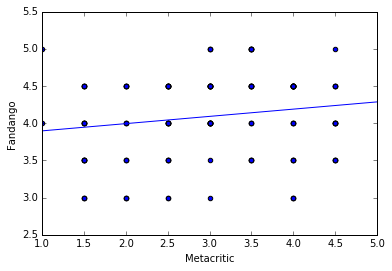

In [42]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.xlabel('Metacritic')
plt.ylabel('Fandango')

plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlim(1, 5)

plt.show()